In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importando a bse inicial de sados
# Trabalhando com a base de informações sobre o Titanic 

df = pd.read_csv(r'C:\Users\leand\Jupyter\Curso - PA Analytics\Projeto Final\train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1 - Entendendo os tipos de variáveis que temos na base

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# criando duas Listas com nome das colunas, uma para colunas Qualitaivas e outra para a Quantitativas

quali = []
quanti = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        quali.append(i)
    else:
        quanti.append(i)

In [6]:
print('Lista Qualitativas: ',quali)
print('Listas Quantitativas: ',quanti)

Lista Qualitativas:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Listas Quantitativas:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


# Estatística Descritiva e Tabelas de Frequência

In [7]:
# Cria um dataframe para as variáveis Quanti para fazermos estatística descritiva

df_quanti = df[quanti] #Segmenta o dataframe usando a lista criada, pois a lista ja tem os colchetes 

In [8]:
df_quanti

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [9]:
#Estátistica descritiva

df_quanti.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Calculando a mediana

df.median()

C:\Users\leand\AppData\Local\Temp/ipykernel_11836/3852053936.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

In [11]:
#Tabela de Frequência para as variáveis qualitativas
#Crando o df_quali

df_quali = df[quali]

# Fazendo a tabela de frequencia para a variavel sex
df_quali.groupby('Sex').Name.count() #usado a coluna name como referencia por ter valor preenchido
#em todas as linhas 

Sex
female    314
male      577
Name: Name, dtype: int64

In [12]:
# Contruindo as tabelas de Frequencia de uma so vez

# Considerando a váriavel Name que sempre sera única para cada passageiro

for i in df_quali.columns:
    if i == 'Name':
        pass
    else:
        print('----------------------')
        print('Variável: ',i)
        print(df_quali.groupby(i).Name.count())
        print('----------------------')
        

----------------------
Variável:  Sex
Sex
female    314
male      577
Name: Name, dtype: int64
----------------------
----------------------
Variável:  Ticket
Ticket
110152         3
110413         3
110465         2
110564         1
110813         1
              ..
W./C. 6608     4
W./C. 6609     1
W.E.P. 5734    1
W/C 14208      1
WE/P 5735      2
Name: Name, Length: 681, dtype: int64
----------------------
----------------------
Variável:  Cabin
Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     2
G6     4
T      1
Name: Name, Length: 147, dtype: int64
----------------------
----------------------
Variável:  Embarked
Embarked
C    168
Q     77
S    644
Name: Name, dtype: int64
----------------------


# 3 - Deteclçao de Dados Nulos

In [13]:
# Para cada variável no DF, iremos pegar a quantidade de dados nulos

# Iremos visualizar quantos nulos temos em cada variável
# Vamos criar uma tabela para visualizar isso (um Data Frame)

nulos = pd.DataFrame() #pd.DataFrame cria um dataframe Vazio
nulos['Variável'] = df.columns

In [14]:
nulos

,Variável
0,PassengerId
1,Survived
2,Pclass
3,Name
4,Sex
5,Age
6,SibSp
7,Parch
8,Ticket
9,Fare


In [15]:
#Vamos colocar na outra coluna, a quantidade de nulos no DF

nulos['Quantidade'] = pd.Series() # pd.Series() cria colunas vazias no DataFrame
nulos['Porcentagem'] = pd.Series()

for i in nulos.index:
    nulos.Quantidade[i] = df[nulos['Variável'][i]].isna().sum()
    
    nulos.Porcentagem[i] = (df[nulos['Variável'][i]].isna().sum()/df.PassengerId.count())*100

C:\Users\leand\AppData\Local\Temp/ipykernel_11836/2072162791.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  nulos['Quantidade'] = pd.Series() # pd.Series() cria colunas vazias no DataFrame
C:\Users\leand\AppData\Local\Temp/ipykernel_11836/2072162791.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  nulos['Porcentagem'] = pd.Series()
C:\Users\leand\AppData\Local\Temp/ipykernel_11836/2072162791.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulos.Quantidade[i] = df[nulos['Variável'][i]].isna().sum()
C:\Users\leand\AppData\Local\Temp/ipykernel_11836/2072

In [16]:
nulos

,Variável,Quantidade,Porcentagem
0,PassengerId,0.0,0.000000
1,Survived,0.0,0.000000
2,Pclass,0.0,0.000000
3,Name,0.0,0.000000
4,Sex,0.0,0.000000
5,Age,177.0,19.865320
6,SibSp,0.0,0.000000
7,Parch,0.0,0.000000
8,Ticket,0.0,0.000000
9,Fare,0.0,0.000000


## Qual Estratégia usar ? 

#### Para a variável Cabin, Temos muitos dados vazios, se removermos todas as linhas vazias, podemos acabar com um dataframe sem quase nenhuma linha para usar. 

#### No caso da Variável Age também temos uma quantidade relevante de vazios (~20%)

#### Apenas no variável Embarked temos poucos vazios (0.22%)

## Faremos o seguinte

#### Removeremos as linhas vazias na variável Embarked

#### Para Age e Cabin iremos preencher

#### Age é quantitativa (Podemos usar a média de idade para preencher os vazios)

#### Cabin é qualitativa (Podemos usar a moda, cabine que mais se repete para preencher)

In [17]:
# Removendo as linhas da variável embarked

df2 = df.dropna(subset=['Embarked'])

In [18]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
# Preenchendo a variável age

df3 = df2.copy()
df3.Age = df2.Age.fillna(df2.Age.mean())

In [20]:
df3.Age.isna().sum()

0

In [21]:
# Preencher a varíavel Cabin

df4 = df3.copy()
print(df4.Cabin.mode())

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object


In [24]:
# Temos mais de uma moda na variável Cabin (mais de um valor é o que mais se repete)

#Então iremos escolher um valor aleatório dentro da moda para preencher aleatóriamente

moda = []
for i in df4.Cabin.mode().values:
    moda.append(i)
    


In [25]:
#Lista com os valores da Moda das Cabines
moda

['B96 B98', 'C23 C25 C27', 'G6']

In [26]:
# Preenchendo com valores aleatórios da moda

import random

df4.Cabin = df4.Cabin.fillna(random.choice(moda))

In [27]:
df4.Cabin.isna().sum()

0

In [28]:
df4 # Dataframe Não possui mais valores vazios

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,C23 C25 C27,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,C23 C25 C27,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.642093,1,2,W./C. 6607,23.4500,C23 C25 C27,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


# 4 - Detecção de Outliers

<AxesSubplot:>

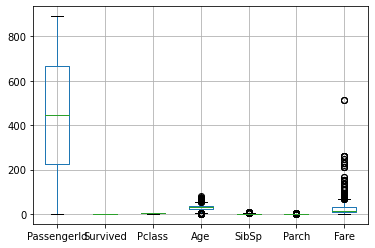

In [30]:
# Usaremos primeiro o boxplot como recursos para identificar os outliers
#o Boxplot apenas funciona com variaveis quantitativas

df4.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x174f2857d00>,
 'caps': [<matplotlib.lines.Line2D at 0x174f2865460>,
 'boxes': [<matplotlib.lines.Line2D at 0x174f2857970>],
 'medians': [<matplotlib.lines.Line2D at 0x174f2865b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x174f2865f10>],
 'means': []}

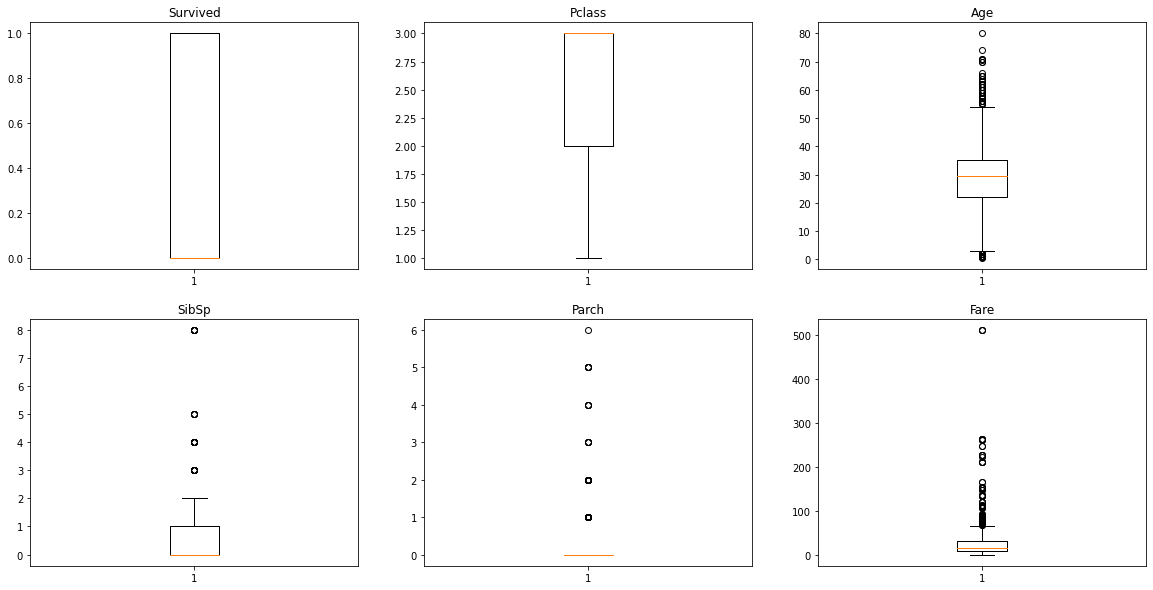

In [33]:
fig, axs = plt.subplots(2,3,figsize=(20,10))

axs[0,0].set_title('Survived')
axs[0,0].boxplot(df4.Survived)

axs[0,1].set_title('Pclass')
axs[0,1].boxplot(df4.Pclass)

axs[0,2].set_title('Age')
axs[0,2].boxplot(df4.Age)

axs[1,0].set_title('SibSp')
axs[1,0].boxplot(df4.SibSp)

axs[1,1].set_title('Parch')
axs[1,1].boxplot(df4.Parch)

axs[1,2].set_title('Fare')
axs[1,2].boxplot(df4.Fare)

### Dependendo da váriavel temos uma quantidade muito grande de Outliers, por exemplo Parch, Age, Fare

### Anaisaremos as 3 variaveis calculando qual a % de outliers

In [51]:
#Calcula de OutLiers

#Todos os pontos que estão fora do limite superior e inferior da amostra

# Limite Superior = Q3 + 1,5 * DistanciaInterquartil
# Limite Inferior = Q1 - 1,5 * DistanciaInterquartil 

# Distancia Interquartil = Valor do 3° Quartil - valor do 1° quartil (Q3 - Q1)

#Fazendo este calculo para estas o DataFrame todo (Apenas o Quantitativo)


df4_quanti = df4[quanti]
colunas = df4_quanti.columns
outliers = []

#Percorre as Colunas e faz os calculos para identificar o lim. inf. e lim. sup e a dist. interquartil
for i in df4_quanti.columns:
    q3 = np.quantile(df4_quanti[i],0.75)
    q1 = np.quantile(df4_quanti[i],0.25)
    dist = q3 - q1
    lim_inf = q1 - 1.5*dist
    lim_sup = q3 + 1.5*dist
    print('----------------')
    print('Coluna: ',i)
    print('Distancia inter: ',dist)
    print('Lim. Inferior: ',lim_inf)
    print('Lim. Superior: ',lim_sup)
    print('----------------')
    
    outlier = 0
     # este loop verificar se os valores em cada linha esta acedendo dos limites
    for j in df4_quanti.index:
        if df4_quanti[i][j] < lim_inf: # i representa a variavel da coluna, J representa a linha
            outlier = outlier +1
        elif df4_quanti[i][j] > lim_sup:
            outlier = outlier +1
        else:
            pass
    
    outliers.append(outlier)
    
df_outlier = pd.DataFrame()
df_outlier['Variável'] = colunas
df_outlier['Outliers'] = outliers
df_outlier['Porcentagem'] = (outliers/df4_quanti.PassengerId.count())*100


    

----------------
Coluna:  PassengerId
Distancia inter:  444.0
Lim. Inferior:  -442.0
Lim. Superior:  1334.0
----------------
----------------
Coluna:  Survived
Distancia inter:  1.0
Lim. Inferior:  -1.5
Lim. Superior:  2.5
----------------
----------------
Coluna:  Pclass
Distancia inter:  1.0
Lim. Inferior:  0.5
Lim. Superior:  4.5
----------------
----------------
Coluna:  Age
Distancia inter:  13.0
Lim. Inferior:  2.5
Lim. Superior:  54.5
----------------
----------------
Coluna:  SibSp
Distancia inter:  1.0
Lim. Inferior:  -1.5
Lim. Superior:  2.5
----------------
----------------
Coluna:  Parch
Distancia inter:  0.0
Lim. Inferior:  0.0
Lim. Superior:  0.0
----------------
----------------
Coluna:  Fare
Distancia inter:  23.1042
Lim. Inferior:  -26.7605
Lim. Superior:  65.6563
----------------


In [49]:
df_outlier

,Variável,Outliers,Porcentagem
0,PassengerId,0,0.000000
1,Survived,0,0.000000
2,Pclass,0,0.000000
3,Age,65,7.311586
4,SibSp,46,5.174353
5,Parch,213,23.959505
6,Fare,114,12.823397


#### Nestes casos (Age e SibSp) a quantidade de iutliers é pouco influente, poderiamos fazer um drop nestas linhas.

#### No caso de Parch e Fare, teriamos que entender se são variaveis que importam muito para resolver o problema, para saber como tratar os outliers (de repente estudando eles separadamente, fazendo um modelo especifico segmentando este público)

#### para este problema em especifico vamos manter os outliers apesar de estarem de identificados

# 5 - Visualização de Dados

#### Vamos tentar entender o que pode influenciar na taxa de sobrevivencia da tripulação

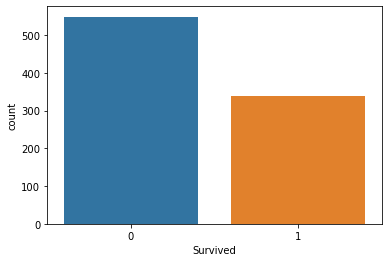

In [54]:
#Quantas pessoas morreram e quantas sobreviveram

sns.countplot(x='Survived',data=df4);

In [56]:
#Quantas pessoas morreram e sobreviveram, separadas por sexo

df4.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    231
          male      109
Name: Survived, dtype: int64

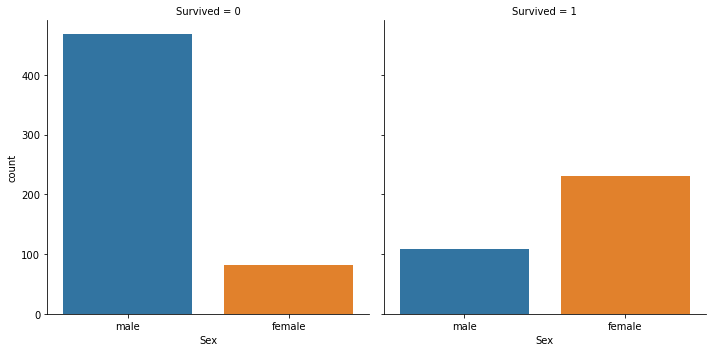

In [58]:
sns.catplot(x='Sex',col='Survived',kind='count',data=df4);

#### Aparentemente Mulheres tem uma melhor taxa de sobrevivencia que homens

#### ------------------

#### Verificando se a Classe que eles estavam viajando também influencia

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


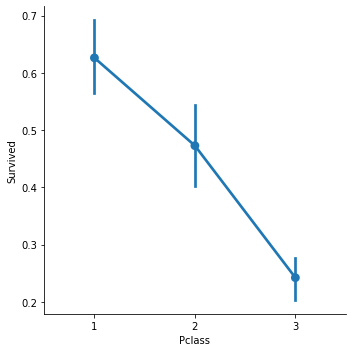

In [59]:
sns.catplot('Pclass','Survived',kind='point',data=df4);

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


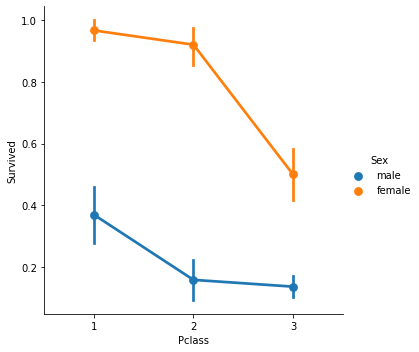

In [61]:
sns.catplot('Pclass','Survived',hue='Sex',kind='point',data=df4);

#### Aparentemente para homens e mulheres, quanto menor a classe que viajavam, mais provavel de nao sobreviver, no caso das mulheres essa diferença é ainda maior

### Para Embarked

##### C = Cherbourg, Q = Queenstown, S = Southampton

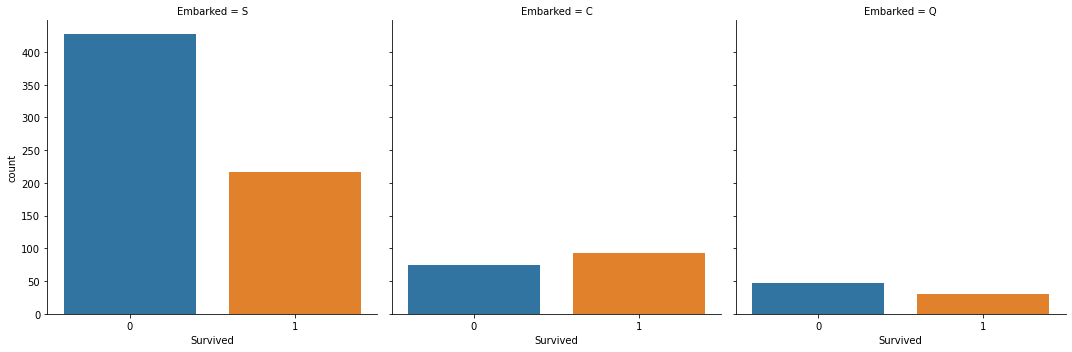

In [63]:
sns.catplot(x='Survived', col='Embarked', kind='count',data=df4);

#### Para Age

<AxesSubplot:xlabel='Survived', ylabel='Age'>

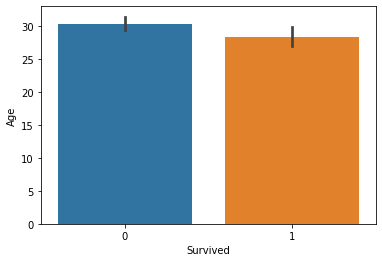

In [65]:
sns.barplot(x='Survived', y='Age',data=df4)

## Correlação entre todas as variaveis

<AxesSubplot:>

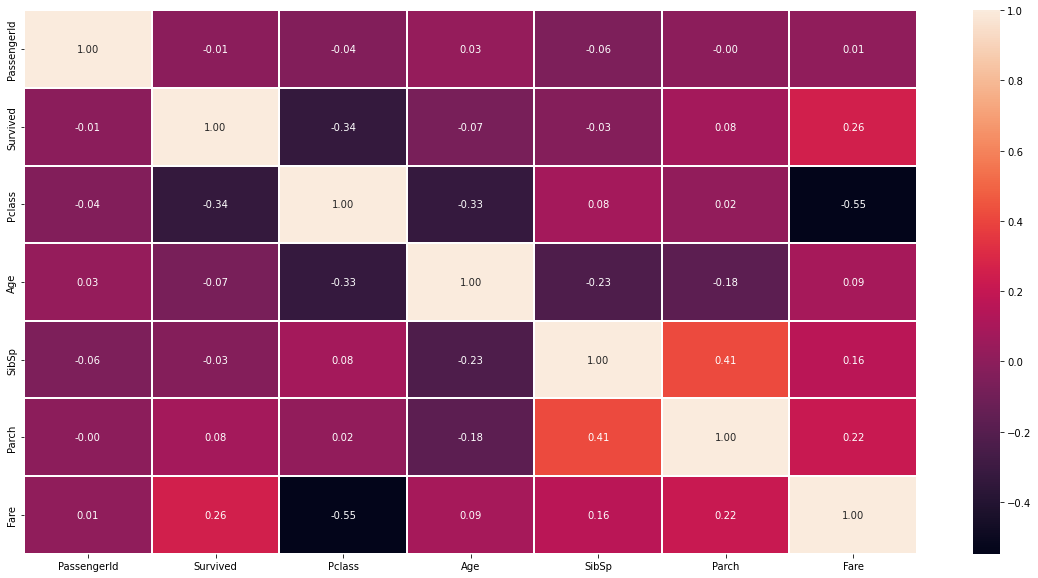

In [66]:
plt.figure(figsize=(20,10))
sns.heatmap(df4.corr(),annot = True, linewidths=1.5,fmt = '.2f')

## ----------------------------------

### Fim do NoteBook